# Classification:  Data Exploration

> Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypotheses and to check assumptions with the help of summary statistics and graphical representations.
>
> [Prasad Patil, Novice Data Science Storyteller, Mar 23](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

The goals of exploration are to understand the signals in the data, their strength, the features that drive the outcome, and other features to construct through questions and hypotheses, in order to walk away with modeling strategies (feature selection, algorithm selection, evaluation methods, e.g.) and actionable insight.

In general, we'll be exploring our target variable against the independent, or predictor, variables.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
# Our EDA biggies:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# statistical testing
from scipy import stats

# Pipeline status: We are past acquire, prep, going into expolore
# import acquire
from acquire import get_titanic_data
# import prepare
from prepare import train_validate_test_split

# grabbing data
df = get_titanic_data()
# remove the deck column
df = df.drop(columns='deck')

Using cached csv


In [2]:
# binary operators for vectorized applications:
# & instead of and, | instead of or, ~ instead of not
df[~ df.age.isna()].shape

(714, 12)

In [3]:
df.shape

(891, 12)

In [4]:
# dataframe where the age is not null
df = df[~ df.age.isna()]
# dataframe where the embark is not null
df = df[~ df.embarked.isna()]
# drop out passenger id
df = df.drop(columns=['passenger_id'])
# data split
train, validate, test = train_validate_test_split(df)

In [5]:
# validate and test to be out-of-sample

train.shape, validate.shape, test.shape

((398, 11), (171, 11), (143, 11))

In [6]:
# in-sample means the data we look at
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
450,0,2,male,36.0,1,2,27.75,S,Second,Southampton,0
543,1,2,male,32.0,1,0,26.00,S,Second,Southampton,0
157,0,3,male,30.0,0,0,8.05,S,Third,Southampton,1
462,0,1,male,47.0,0,0,38.50,S,First,Southampton,1
397,0,2,male,46.0,0,0,26.00,S,Second,Southampton,1


#### We will examine the data in three different primary ways:
 - 1. Univariate Exploration:
     - One variable exploration:
     - Things we do with a single Series: Box/Whisker plots, histograms, value_counts
 - 2. Bivariate Exploration:
     - Comparing one variable to another (our target)
     - scatter plots, bar charts, etc
 - 3. Multivariate Exploration:
     - Just like the last one, but more (think extra dimensions like hue, size, etc)

## Explore the Target
- What is the thing we're trying to predict?

In [8]:
# our y variable is who survived:
# This is a binary classsification problem, with the positive class 1 being those
# that survived, and 0 being those that did not survive

In [9]:
train.survived.value_counts(normalize=True)

0    0.595477
1    0.404523
Name: survived, dtype: float64

<AxesSubplot:>

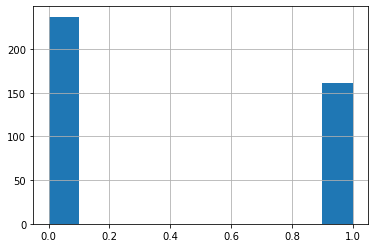

In [11]:
train.survived.hist()

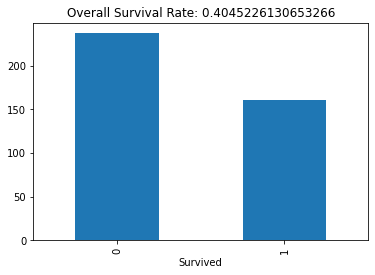

In [13]:
train.survived.value_counts().sort_index().plot.bar()
survival_rate = train.survived.mean()
plt.title(f'Overall Survival Rate: {survival_rate}')
plt.xlabel("Survived")
plt.show()

In [14]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'embark_town', 'alone'],
      dtype='object')

<AxesSubplot:>

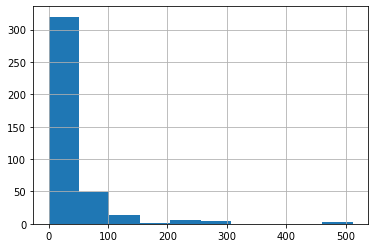

In [15]:
train.fare.hist()

<AxesSubplot:>

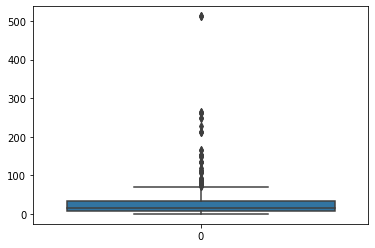

In [16]:
sns.boxplot(data=train.fare)

In [18]:
train.describe()

,survived,pclass,age,sibsp,parch,fare,alone
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.404523,2.211055,30.222161,0.500000,0.422111,37.093718,0.565327
std,0.491417,0.843215,14.595995,0.905483,0.838443,61.282772,0.496338
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,29.000000,0.000000,0.000000,15.850000,1.000000
75%,1.000000,3.000000,40.000000,1.000000,1.000000,32.875000,1.000000
max,1.000000,3.000000,74.000000,5.000000,6.000000,512.329200,1.000000


`survived` can be treated as either a categorical variable or a number. For example, we are treating survived as a categorical variable when we look at the value counts above. We could also treat survived as a categorical variable and explore other features through the `survived` category.

Treating `survived` as a number lets us take the average, which we can interpret as the overall survival rate.

## Barplots

Here we'll treat `survived` as a number and explore its interactions with other categorical features. For each other categorical feature, we will calculate the survival rate among its subgroups and visualize them with a barplot.

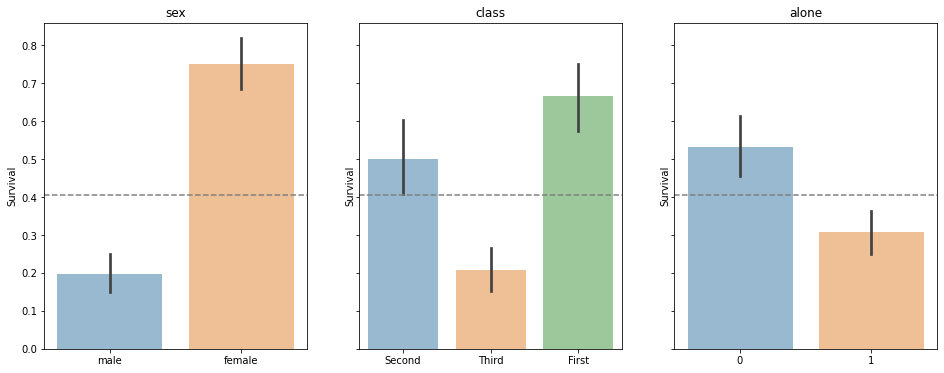

In [23]:
features = ['sex', 'class', 'alone']
# lets examine survival mean:
survival_rate = train.survived.mean()

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Survival')
    ax[i].set_title(feature)
    ax[i].axhline(survival_rate, ls='--', color='grey')

Here we add a horizontal dashed line at the overall survival rate in order to be able to quickly visually compare the subgroup survival rates against the overall rate in addition to comparing to the survival rate for other subgroups.

The black lines on the top of each bar give us the 95% confidence interval for our estimate of the average for each subgroup.

<AxesSubplot:xlabel='class', ylabel='count'>

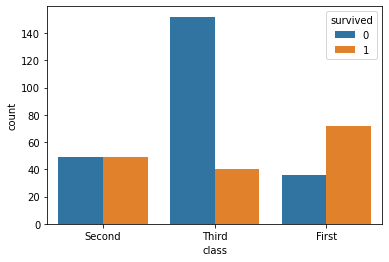

In [24]:
# countplot
sns.countplot(x='class', data=train, hue='survived')

### Continuous vs. Continuous
- Use a .scatterplot
- Try a .regplot

In [25]:
train.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
450,0,2,male,36.0,1,2,27.75,S,Second,Southampton,0
543,1,2,male,32.0,1,0,26.00,S,Second,Southampton,0


<AxesSubplot:xlabel='age', ylabel='fare'>

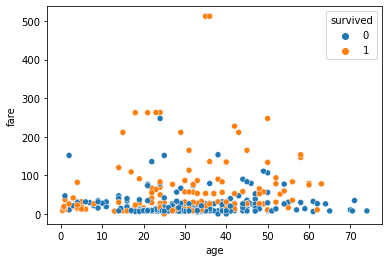

In [27]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x='age', y='fare', hue='survived', data=train)

In [ ]:
# takeaways:
# would this look different if i removed outliers, or scaled the data?
# would this look more meaningful if i break it down into a multivariate observation

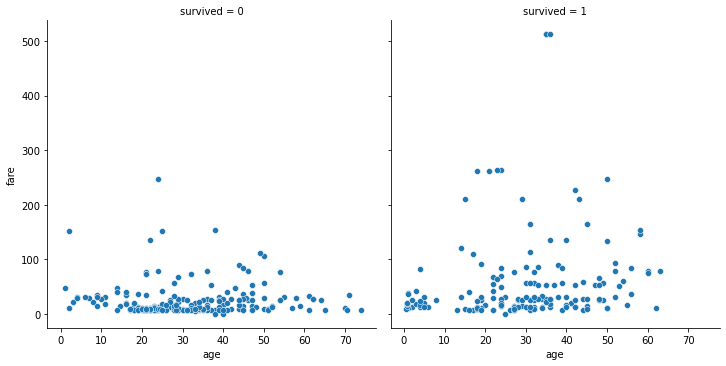

In [28]:
# col argument is a discrete variable feature in our dataset
sns.relplot(x='age', y='fare', col='survived', data=train)

### Swarmplot: Discrete x Continuous

A swarmplot can be used to plot a numeric variable with a discrete or categorical variable. Here we are looking at the relationship between class and age and adding the additional dimension of whether or not the passenger survived.

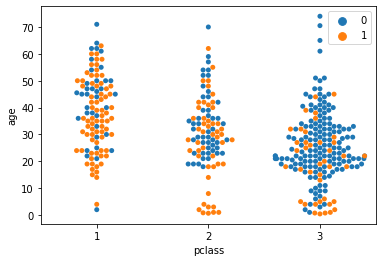

In [30]:
sns.swarmplot(x='pclass', y='age', data=train, hue='survived')
plt.legend()
plt.show()

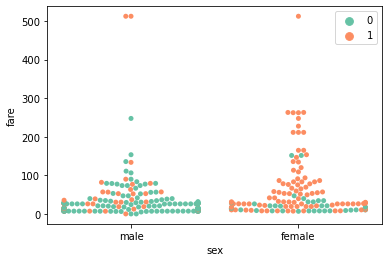

In [31]:
sns.swarmplot(x='sex', y='fare', data=train, hue='survived', palette='Set2')
plt.legend()
plt.show()

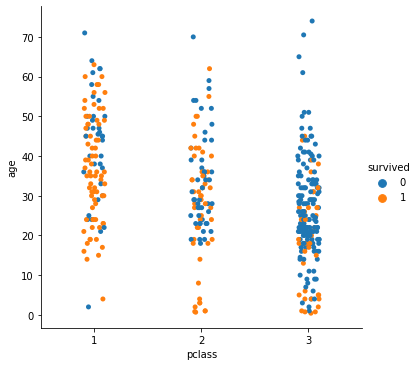

In [33]:
sns.catplot(x='pclass', y='age', data=train, hue='survived')
plt.show()

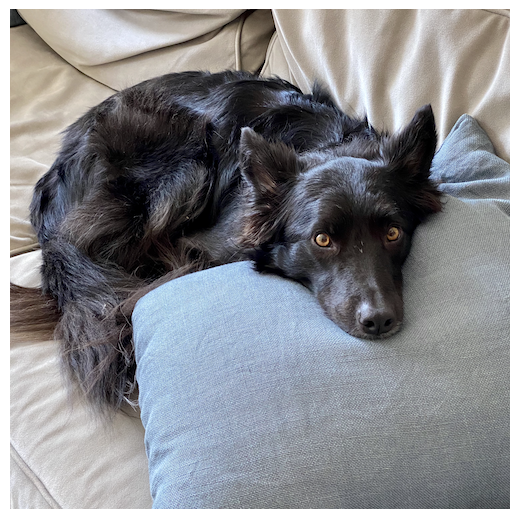

In [34]:
sns.dogplot()

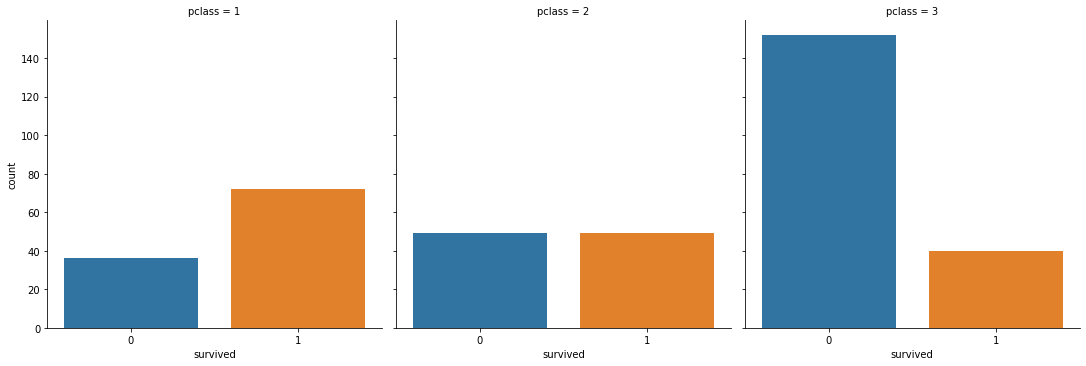

In [36]:
# Catplot with kind="count"
sns.catplot(x='survived', col='pclass', data=train, kind='count')
plt.show()

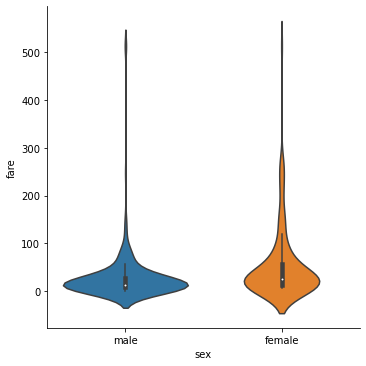

In [37]:
# Catplot with kind="violin"
sns.catplot(x='sex', y='fare', data=train, kind='violin')
plt.show()

### Violinplot: Discrete x Continuous


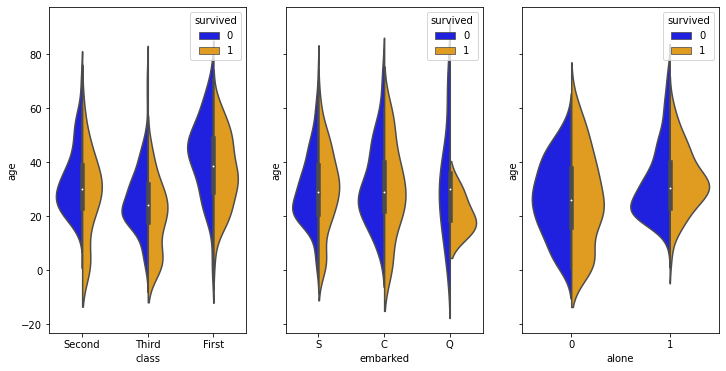

In [40]:
features = ['class', 'embarked', 'alone']
_, ax = plt.subplots(nrows=1, ncols=3, figsize=[12,6], sharey=True)

for i, feature in enumerate(features):
    sns.violinplot(
    feature,
    'age',
    split=True,
    hue='survived',
    data=train,
    ax=ax[i],
    palette=['blue', 'orange'])

### Crosstab: Discrete x Discrete

Matrix of counts or probabilities

In [42]:
xtab = pd.crosstab(train.pclass, train.survived, margins=True)

<AxesSubplot:xlabel='survived', ylabel='pclass'>

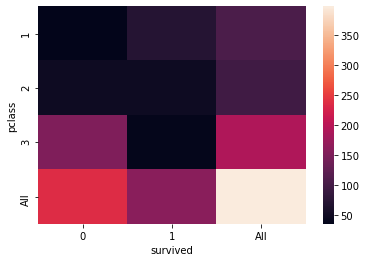

In [43]:
sns.heatmap(xtab)

There definitely appears to be a difference in the survival rate of those in 1st class vs. 3rd class. 

## Continuous x Continuous

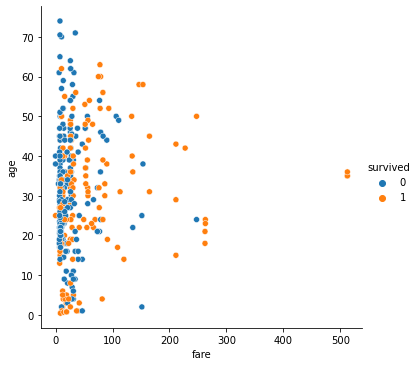

In [45]:
sns.relplot(x='fare', y='age', hue='survived', data=train)
plt.show()

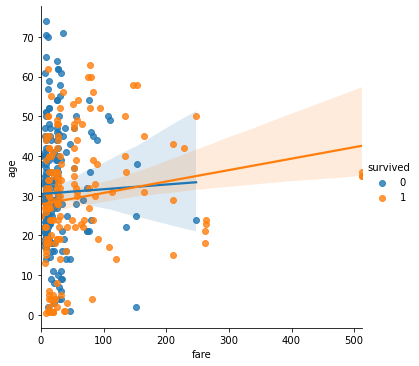

In [46]:
sns.lmplot(x='fare', y='age', hue='survived', data=train)
plt.show()

### Melting Multiple Continuous Variables

Melting lets us compare multiple continuous variables that have the same or similarly scaled units on the same visualization.

In [47]:
melt = train[['survived', 'age', 'fare']].melt(id_vars='survived', var_name='measurement')

In [48]:
melt

# setting to logscale 


,survived,measurement,value
0,0,age,36.0000
1,1,age,32.0000
2,0,age,30.0000
3,0,age,47.0000
4,0,age,46.0000
...,...,...,...
791,1,fare,93.5000
792,1,fare,13.0000
793,1,fare,83.1583
794,0,fare,73.5000


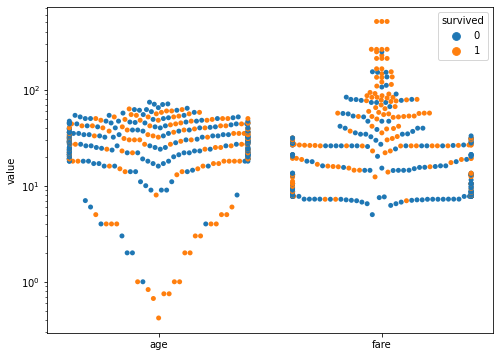

In [50]:
plt.figure(figsize=(8,6))
p = sns.swarmplot(
x='measurement',
y='value',
hue='survived',
data=melt)
p.set(yscale='log', xlabel='')
plt.show()

## Statistical Testing

As an example of statistical testing, we'll take a look at the relationship between survival and age. For all of our statistical testing:

1. Experiments should be **reproducible**: If someone runs through the experiment with the same data, they should get the same results.  If someone runs through the experiment with another sample of the data, they should arrive at the same conclusion.  
2. Experiments should be **documented** succintly and focusing on the essential aspects of the tasks involved.

Experiment: Compare two groups: Is the age of survivors significantly different from that of the non-survivors?

- $H_{0}$: the difference in age between subset A, survivors, and subset B, non-survivors, is insubstantial (basically 0).  
- $H_{a}$: the difference between subset A, survivors, and subset B, non-survivors is substantial
- Test if the observations with survivors (subset A) has significantly different ages than that of non-survivors (subset B).  
- If there is a difference, then `Age` is a good choice to keep as a feature.  
- We can use a t-test here, as `Age` is somewhat normally distributed.     

In [ ]:
# alpha = 0.05

In [51]:
# means testing: independent t test, comparing two subgroups
stats.ttest_ind(
train[train.survived == 1].age,
train[train.survived == 0].age)

Ttest_indResult(statistic=-0.8137563508309718, pvalue=0.41627357274555576)

In [52]:
train.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
450,0,2,male,36.0,1,2,27.75,S,Second,Southampton,0
543,1,2,male,32.0,1,0,26.00,S,Second,Southampton,0


In [53]:
observed = pd.crosstab(train.pclass, train.survived)

In [54]:
observed

survived,0,1
pclass,,
1,36,72
2,49,49
3,152,40


In [56]:
# survived vs class:
# H0: Class of passenger is independent of Survival
# Ha: Class of passenger is not independent of Survival

# alpha = 0.05
# If we have a p value of < 0.05, we can reject H0

In [55]:
stats.chi2_contingency(observed)

(65.19813751954644,
 6.956716773744683e-15,
 2,
 array([[ 64.31155779,  43.68844221],
        [ 58.35678392,  39.64321608],
        [114.33165829,  77.66834171]]))

We can reject the null hypothesis that there is independence between class and surival, bolstering what we observed visually with statistical significance

## Take a moment to list out the categorical variable
- If we're doing classification, our target variable will be *categorical*
- List out our continuous variables
- If we're comparing continuous to continuous, we use .correlation 
    - Example: total_bill to tip
    - Example: fare to age
- If we're comparing categorical to categorical, we're chi^2
    - Example: pclass to sex
    - Example: day to smoker (in the tips dataset)
- If we're comparing continous among different categories, t-test
    - Example: comparing total_bills between smokers and nonsmokers
    - Example: comparing fare between pclass on Titanic
    - Example: comparing age between pclass on Titanic dataset

Based on our p-value, we would fail to reject the null hypothesis that age is not significantly different for passengers that survived and those that didn't.

## Exercises

Continue in your `classification_exercises.ipynb` notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.
   
2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length
    
    What are your takeaways?

4. Create a heatmap of each variable layering correlation coefficient on top.

5. Create a scatter matrix visualizing the interaction of each variable.

6. Is the sepal length significantly different in virginica compared to versicolor? Run
   a statistical experiment to test this.

    Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
    
    What is your takeaway from this statistical testing?
    
7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.